# Library

In [19]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,InputLayer 
from tensorflow.keras.activations import linear,relu,sigmoid
import matplotlib.pyplot as plt 

import logging 
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *
from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

# Dataset

ecks. 


<a name="4.2"></a>
### 4.2 Dataset

You will start by loading the dataset for this task. 
- The `load_data()` function shown below loads the data into variables `X` and `y`


- The data set contains 5000 training examples of handwritten digits $^1$.  

    - Each training example is a 20-pixel x 20-pixel grayscale image of the digit. 
        - Each pixel is represented by a floating-point number indicating the grayscale intensity at that location. 
        - The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional vector. 
        - Each training examples becomes a single row in our data matrix `X`. 
        - This gives us a 5000 x 400 matrix `X` where every row is a training example of a handwritten digit image.

$$X = 
\left(\begin{array}{cc} 
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\ 
--- (x^{(m)}) --- 
\end{array}\right)$$ 

- The second part of the training set is a 5000 x 1 dimensional vector `y` that contains labels for the training set
    - `y = 0` if the image is of the digit `0`, `y = 4` if the image is of the digit `4` and so on.

$^1$<sub> This is a subset of the MNIST handwritten digit dataset (http://yann.lecun.com/exdb/mnist/)</sub>

In [8]:
x, y = load_data()

In [10]:
print(f"The shape of x = {x.shape}")
print(f"The shape of y = {y.shape}")

The shape of x = (5000, 400)
The shape of y = (5000, 1)


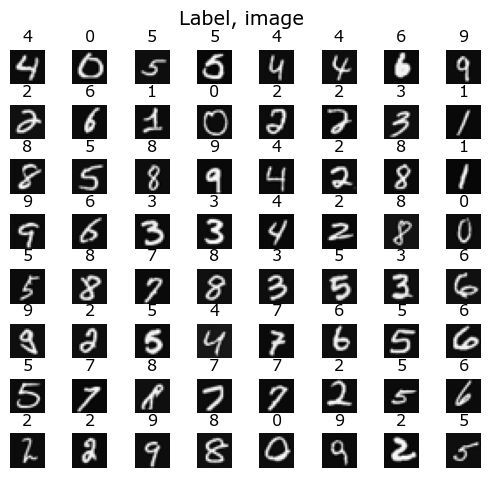

In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x.shape #(5000,400)

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    # note/ the image is 20*20 but in the data it saved on array so we have to reshape it
    X_random_reshaped = x[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

# Model

<a name="4.3"></a>
### 4.3 Model representatio

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    
<img src="Capture.PNG">>

In [27]:
tf.random.set_seed(1234)
model = Sequential(
    [
        InputLayer((400,)),
        Dense(25,activation=relu, name="layer_1"),
        Dense(15,activation=relu,name="layer_2"),
        Dense(10,activation=linear,name="layer_3") # the output layer
    ],name="my_model"
)


In [29]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                      │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_2 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer_3 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
[layer1,layer2,layer3]= model.layers

In [32]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [39]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)
mo=model.fit(
    x,y,epochs=50
)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.9621e-04
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5551e-04
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.8524e-04
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9059e-04
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7059e-04
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5746e-04
Epoch 9/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4693e-04
Epoch 10/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3898e-04
Epoch 11/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3136e-04
Epoch 12/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2495e-04
Epoch 13/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1972e-04
Epoch 14/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1432e-04
Epoch 15/

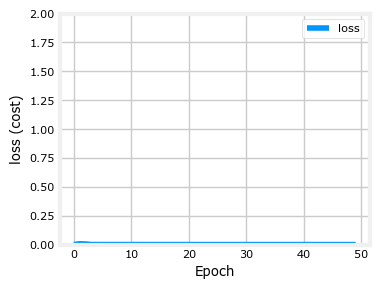

In [40]:
plot_loss_tf(mo)

# Prediction

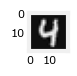

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
 predicting a Two: 
[[-26.12  -4.16  13.41  -4.62 -26.7  -27.82 -28.47  -7.52 -22.34 -11.3 ]]
 Largest Prediction index: 2


In [44]:
image = x[2020]  # choose any image you want, you got 5000 images
display_digit(image)

prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [47]:
p=model.predict(image.reshape(1,400))# remember every image is 20*20
yhat = np.argmax(tf.nn.softmax(p))

print(f"np.argmax(prediction_p): {yhat}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
np.argmax(prediction_p): 4


Note / if you did not use "argmax it will return the probability of the value of this image"

Let's compare the predictions vs the labels for a random sample of 64 digits. This takes a moment to run

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━

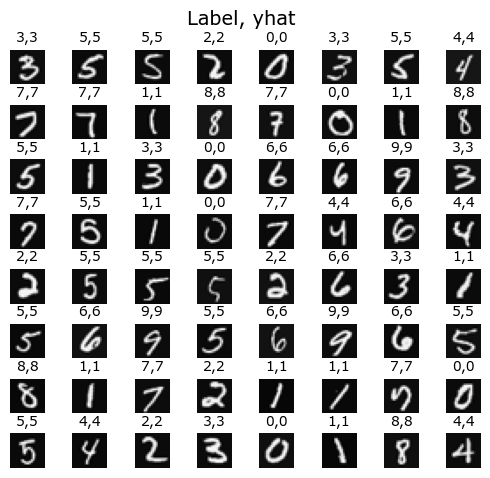

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = x.shape # m.shape =(5000,400)

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = x[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(x[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [51]:
print( f"{display_errors(model,x,y)} errors out of {len(x)} images")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
no errors found
0 errors out of 5000 images
